In [2]:
import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import os 


# 2 dataset

# 2.1 download dataset

In [3]:
!mkdir /tmp/SE22

In [4]:
# download train csv  
!wget --no-check-certificate \
    https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train.csv \
    -O /tmp/SE22/train_SE.csv
# download test csv  
!wget --no-check-certificate \
    https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/test.csv \
    -O /tmp/SE22/test_SE.csv

# download train and test csv      
!wget --no-check-certificate \
    https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train_test_data.zip \
    -O /tmp/train_test_data.zip

--2022-11-19 22:35:48--  https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train.csv
Resolving challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)... 52.219.108.122
Connecting to challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)|52.219.108.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130952 (128K) [text/csv]
Saving to: ‘/tmp/SE22/train_SE.csv’

/tmp/SE22/train_SE. 100%[===================>] 127.88K   459KB/s    in 0.3s    

2022-11-19 22:35:48 (459 KB/s) - ‘/tmp/SE22/train_SE.csv’ saved [130952/130952]

--2022-11-19 22:35:49--  https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/test.csv
Resolving challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)...

## 2.2 unzip images 



```python
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
```



In [5]:
# i use % instead of !, because % keeps us in the directory and ! doesnt 
%cd /tmp/SE22
print("-"*50)
print("Extracting files the dataset: ")
!unzip -u /tmp/train_test_data.zip
os.system('cls')
print("unpackaged dataset: ")

/tmp/SE22
--------------------------------------------------
Extracting files the dataset: 
Archive:  /tmp/train_test_data.zip
   creating: train_test_data/test/
  inflating: train_test_data/test/1.png  
  inflating: train_test_data/test/1000.png  
  inflating: train_test_data/test/1001.png  
  inflating: train_test_data/test/1002.png  
  inflating: train_test_data/test/1004.png  
  inflating: train_test_data/test/1005.png  
  inflating: train_test_data/test/1006.png  
  inflating: train_test_data/test/1007.png  
  inflating: train_test_data/test/101.png  
  inflating: train_test_data/test/1012.png  
  inflating: train_test_data/test/1013.png  
  inflating: train_test_data/test/1024.png  
  inflating: train_test_data/test/1025.png  
  inflating: train_test_data/test/1026.png  
  inflating: train_test_data/test/1028.png  
  inflating: train_test_data/test/103.png  
  inflating: train_test_data/test/1034.png  
  inflating: train_test_data/test/1036.png  
  inflating: train_test_data/test

# 3 EDA 

## 3.1 exploring images data

In [6]:
train_df_dir = os.path.join('/tmp/SE22/train_SE.csv')
test_df_dir = os.path.join('/tmp/SE22/test_SE.csv')
train_data_dir = os.path.join('/tmp/SE22/train_test_data/train')
test_data_dir = os.path.join('/tmp/SE22/train_test_data/test')

train_data_dir lengh:  1714
test_data_dir lengh:  635
file name example:  932.png
image shape (332, 332, 3)
image min and max value in pixels:  0.0 0.34117648


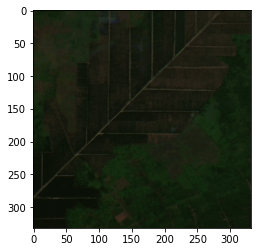

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("train_data_dir lengh: ", len(os.listdir(train_data_dir)))
print("test_data_dir lengh: ", len(os.listdir(test_data_dir)))
print("file name example: ", os.listdir(train_data_dir)[1])

img0_dir = os.path.join(train_data_dir, os.listdir(train_data_dir)[0]) 

img0 = mpimg.imread(img0_dir)
print("image shape" ,img0.shape)
print("image min and max value in pixels: ", np.min(img0) ,np.max(img0))

plt.imshow(img0)
plt.show()

In [8]:
train_df = pd.read_csv(train_df_dir)
test_df = pd.read_csv(test_df_dir)
print(train_df.shape)
print(test_df.shape)
train_df.head(3)

(1714, 5)
(635, 4)


,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png


In [9]:
test_df.head(3)

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png


In [10]:
print(train_df["label"].value_counts())

0    860
2    658
1    196
Name: label, dtype: int64


In [11]:
np.random.randint(0, len(train_df))


846

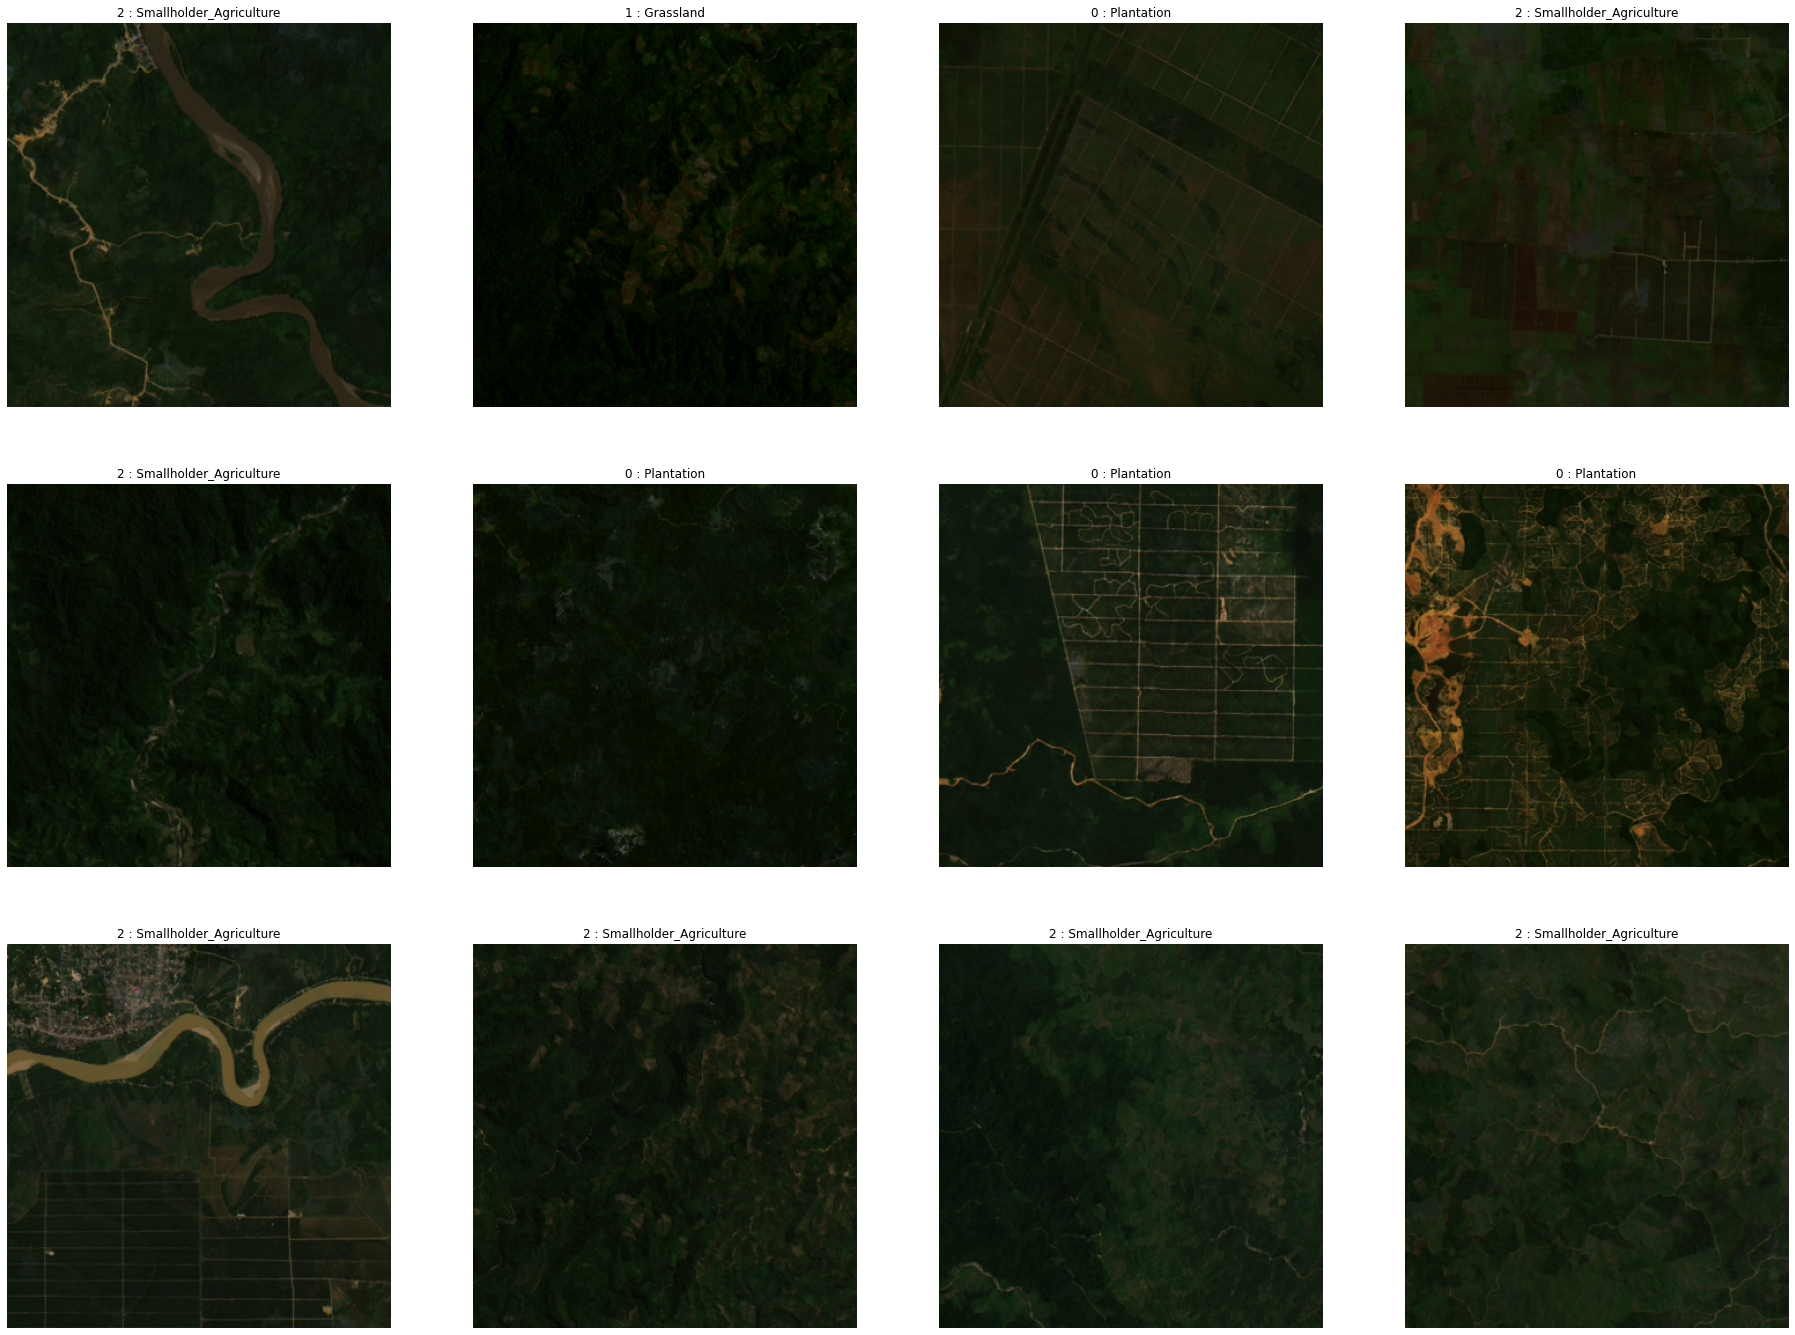

In [12]:
nrows = 3
ncols = 4
img_label = {0:'Plantation', 1: 'Grassland',2:'Smallholder_Agriculture'} # plantacion, paztizales/matorrales, agricultura a pequeña escala

fig = plt.gcf()
fig.set_size_inches(ncols*8, nrows*8)
n_img = np.random.randint(15, len(train_df))

for i, row in enumerate(train_df[n_img-12:n_img].iterrows()):
  n, row = row
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)  
  img = mpimg.imread(row["example_path"])
  plt.imshow(img)
  plt.title("{} : {}".format(row["label"], img_label[row["label"]]))
plt.show()



# load images in X, y

In [13]:
image = []
label = []
img_width = 300 
img_height = 300

for i, row in train_df.iterrows():
  img = cv2.imread(row["example_path"])
  img = cv2.resize(img, (img_height,img_width))
  label.append(row["label"])
  image.append(img)
        
x = np.array(image)
y = np.array(label)




(1714, 300, 300, 3) (1714,)


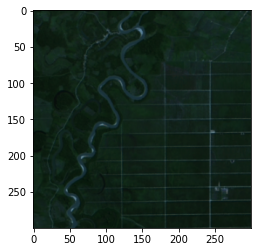

In [14]:
print(x.shape, y.shape)
plt.imshow(x[2])


In [15]:
le = LabelEncoder()

y = le.fit_transform(y)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42, stratify=y)

x_train = x_train/255
x_test = x_test/255

print(x_train.shape, x_test.shape)

(1371, 300, 300, 3) (343, 300, 300, 3)


In [18]:

# this will be used for the second trainig and in testing
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


# model0

In [19]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape = (img_width, img_height, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(3, activation = "softmax"))

#model.summary()

In [20]:
from keras.callbacks import ModelCheckpoint   

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train the model  do not use the flow to train!!!!!
# in this case , if use the NumpyArrayIterator to train, we just have more bad performance

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

CPU times: user 11.2 ms, sys: 59 µs, total: 11.3 ms
Wall time: 11 ms


In [ ]:
%%time
history=model.fit(x_train,y_train,batch_size= len(x_train) // 16 ,epochs = 300, validation_data = (x_test,y_test), callbacks=[checkpointer], verbose = 1)

Epoch 1/300
17/17 [==============================] - ETA: 0s - loss: 1.0005 - accuracy: 0.4785
Epoch 1: val_loss improved from inf to 0.95631, saving model to model.weights.best.hdf5
17/17 [==============================] - 28s 775ms/step - loss: 1.0005 - accuracy: 0.4785 - val_loss: 0.9563 - val_accuracy: 0.5015
Epoch 2/300
17/17 [==============================] - ETA: 0s - loss: 0.9587 - accuracy: 0.5018
Epoch 2: val_loss did not improve from 0.95631
17/17 [==============================] - 11s 633ms/step - loss: 0.9587 - accuracy: 0.5018 - val_loss: 0.9585 - val_accuracy: 0.5015
Epoch 3/300
17/17 [==============================] - ETA: 0s - loss: 0.9628 - accuracy: 0.5018
Epoch 3: val_loss improved from 0.95631 to 0.95014, saving model to model.weights.best.hdf5
17/17 [==============================] - 11s 641ms/step - loss: 0.9628 - accuracy: 0.5018 - val_loss: 0.9501 - val_accuracy: 0.5015
Epoch 4/300
17/17 [==============================] - ETA: 0s - loss: 0.9596 - accuracy: 0.50

In [ ]:
# Guardamos la arquitectura del modelo en un archivo json para uso futuro das

model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

# load of best model and best weights 

In [26]:
# cargamos el modelo que nosotros entrenamos con los mejores weights
with open('./model.json', 'r') as json_file:
    json_savedModel= json_file.read()
model_l = tf.keras.models.model_from_json(json_savedModel)
model_l.load_weights('./model.weights.best.hdf5')
model_l.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics= ["accuracy"])

# second trainig


In [ ]:
%%time
from keras.callbacks import ModelCheckpoint   
checkpointer = ModelCheckpoint(filepath='model_6.hdf5', verbose=1, save_best_only=True)

history_2nd = model_l.fit(datagen.flow(x_train,y_train), batch_size= len(x_train) // 16 ,epochs = 150, validation_data = (x_test,y_test), callbacks=[checkpointer], verbose = 1)

Epoch 1/150
43/43 [==============================] - ETA: 0s - loss: 0.6078 - accuracy: 0.7695
Epoch 1: val_loss improved from inf to 0.67299, saving model to model_6.hdf5
43/43 [==============================] - 29s 650ms/step - loss: 0.6078 - accuracy: 0.7695 - val_loss: 0.6730 - val_accuracy: 0.7318
Epoch 2/150
43/43 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.7724
Epoch 2: val_loss did not improve from 0.67299
43/43 [==============================] - 26s 612ms/step - loss: 0.5852 - accuracy: 0.7724 - val_loss: 0.7458 - val_accuracy: 0.7055
Epoch 3/150
43/43 [==============================] - ETA: 0s - loss: 0.5705 - accuracy: 0.7724
Epoch 3: val_loss improved from 0.67299 to 0.65695, saving model to model_6.hdf5
43/43 [==============================] - 27s 629ms/step - loss: 0.5705 - accuracy: 0.7724 - val_loss: 0.6570 - val_accuracy: 0.7347
Epoch 4/150
43/43 [==============================] - ETA: 0s - loss: 0.5714 - accuracy: 0.7892
Epoch 4: val_loss d

# testing 

In [27]:
#Use the data which is already flowing, also have good performance
model_l.evaluate(datagen.flow(x_test,y_test)) # using datagen
model_l.evaluate(x_test,y_test)
model_l.evaluate(x_train,y_train)  

43/43 [==============================] - 4s 90ms/step - loss: 0.4710 - accuracy: 0.8177


[0.47099119424819946, 0.8176513314247131]

In [28]:
img_label = {0:'Plantation', 1: 'Grassland',2:'Smallholder_Agriculture'} # plantacion, paztizales/matorrales, agricultura a pequeña escala


11/11 [==============================] - 1s 91ms/step


<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fcca00f1590>>

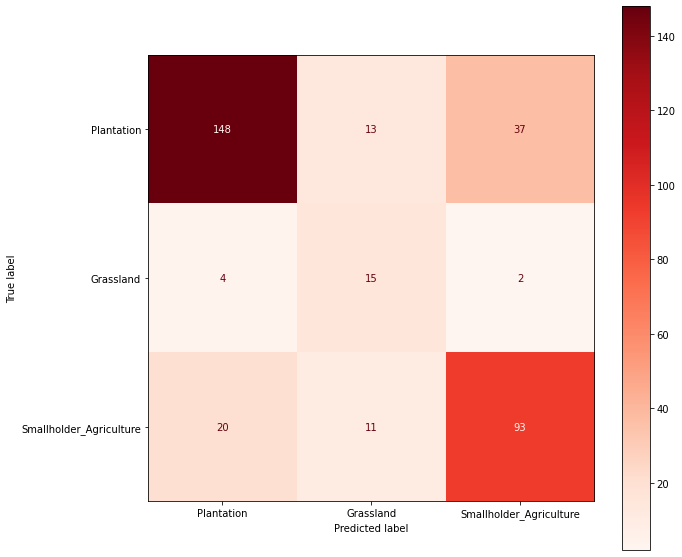

In [29]:
#futher test
from sklearn import metrics 
#import scikitplot as skplt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cm = metrics.confusion_matrix(np.round(model_l.predict(x_test)).argmax(axis=1),y_test )
cm = metrics.ConfusionMatrixDisplay(cm, display_labels=list(img_label.values()))
cm.plot(values_format='d', cmap='Reds',ax=ax )
cm.plot

In [36]:
from sklearn.metrics import classification_report
predicted_classes = np.round(model_l.predict(x_test)).argmax(axis=1)
Y_true = y_test 
print(classification_report(y_true= Y_true, y_pred= predicted_classes))

11/11 [==============================] - 1s 94ms/step
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       172
           1       0.71      0.38      0.50        39
           2       0.75      0.70      0.73       132

    accuracy                           0.75       343
   macro avg       0.74      0.65      0.68       343
weighted avg       0.74      0.75      0.74       343



# convert predict to JSON

In [37]:
img_test = []
for i, row in test_df.iterrows():
  img = cv2.imread(row["example_path"])
  img = cv2.resize(img, (img_height,img_width))
  image.append(img)
        
img_test = np.array(img_test)
img_test = img_test/255

In [43]:
test_predict = model_l.predict(x_test).argmax(axis=1)
test_predict = pd.DataFrame(test_predict, columns=["target"])
test_predict.head(3)

11/11 [==============================] - 1s 85ms/step


,target
0,0
1,0
2,2


In [44]:
test_predict.to_json(r'./predictions.json')